# 1. Data Extraction

In [3]:
import numpy as np
import pandas as pd

data=pd.DataFrame(columns = ['freq','angle','chord_len','fs_vel','suction','Sound_press'])
# Open Auto file
with open(r'C:\Users\CLL\Documents\Github\Ce888 Assignment\Ce888Assignment\1.Airfoil\airfoil_self_noise.dat', 'r', encoding="utf8") as file:
  # Go through each line of the file
    for line in file:
        # Create a list separated by spaces
        items = line.strip(' ').split()
        #Create the dataframe with the info from the database
        data.loc[len(data)]= [items[0],items[1],items[2],items[3],items[4],items[5]]

print(data.keys)
#Save it in a CSV file
data.to_csv('data_airfoil.csv')      

<bound method NDFrame.keys of        freq angle chord_len fs_vel     suction Sound_press
0       800     0    0.3048   71.3  0.00266337     126.201
1      1000     0    0.3048   71.3  0.00266337     125.201
2      1250     0    0.3048   71.3  0.00266337     125.951
3      1600     0    0.3048   71.3  0.00266337     127.591
4      2000     0    0.3048   71.3  0.00266337     127.461
5      2500     0    0.3048   71.3  0.00266337     125.571
6      3150     0    0.3048   71.3  0.00266337     125.201
7      4000     0    0.3048   71.3  0.00266337     123.061
8      5000     0    0.3048   71.3  0.00266337     121.301
9      6300     0    0.3048   71.3  0.00266337     119.541
10     8000     0    0.3048   71.3  0.00266337     117.151
11    10000     0    0.3048   71.3  0.00266337     115.391
12    12500     0    0.3048   71.3  0.00266337     112.241
13    16000     0    0.3048   71.3  0.00266337     108.721
14      500     0    0.3048   55.5  0.00283081     126.416
15      630     0    0.304

# 2. Preproccesing

In [1]:
import numpy as np
import pandas as pd
#print(data.keys)
#Save it in a CSV file
data= pd.read_csv('data_airfoil.csv')

In [2]:
data.describe()

,Unnamed: 0,freq,angle,chord_len,fs_vel,suction,Sound_press
count,1503.000000,1503.000000,1503.000000,1503.000000,1503.000000,1503.000000,1503.000000
mean,751.000000,2886.380572,6.782302,0.136548,50.860745,0.011140,124.835943
std,434.023041,3152.573137,5.918128,0.093541,15.572784,0.013150,6.898657
min,0.000000,200.000000,0.000000,0.025400,31.700000,0.000401,103.380000
25%,375.500000,800.000000,2.000000,0.050800,39.600000,0.002535,120.191000
50%,751.000000,1600.000000,5.400000,0.101600,39.600000,0.004957,125.721000
75%,1126.500000,4000.000000,9.900000,0.228600,71.300000,0.015576,129.995500
max,1502.000000,20000.000000,22.200000,0.304800,71.300000,0.058411,140.987000


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1503 entries, 0 to 1502
Data columns (total 7 columns):
Unnamed: 0     1503 non-null int64
freq           1503 non-null float64
angle          1503 non-null float64
chord_len      1503 non-null float64
fs_vel         1503 non-null float64
suction        1503 non-null float64
Sound_press    1503 non-null float64
dtypes: float64(6), int64(1)
memory usage: 82.3 KB


In [4]:
#Convert to float column horsepower
data[['freq','angle','chord_len','fs_vel','suction','Sound_press']]=data[['freq','angle','chord_len','fs_vel','suction','Sound_press']].astype(float)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1503 entries, 0 to 1502
Data columns (total 7 columns):
Unnamed: 0     1503 non-null int64
freq           1503 non-null float64
angle          1503 non-null float64
chord_len      1503 non-null float64
fs_vel         1503 non-null float64
suction        1503 non-null float64
Sound_press    1503 non-null float64
dtypes: float64(6), int64(1)
memory usage: 82.3 KB


Text(0.5, 1.0, 'X variables')

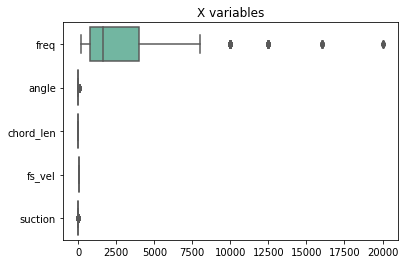

In [9]:
X = (data.drop(['Sound_press','Unnamed: 0'],axis=1))
import seaborn as sns
import matplotlib.pyplot as plt # Plotting
#################
ax = sns.boxplot(data=X, orient="h", palette="Set2")
ax.set_title('X variables')

In [10]:
#Scale the numeric variables to avoid 
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X[['freq']]= scaler.fit_transform(X[['freq']])

Text(0.5, 1.0, 'X variables')

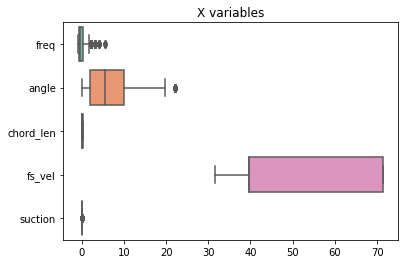

In [11]:
ax = sns.boxplot(data=X, orient="h", palette="Set2")
ax.set_title('X variables')

In [12]:
#Scale the numeric variables to avoid 
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X[['angle','fs_vel']]= scaler.fit_transform(X[['angle','fs_vel']])

Text(0.5, 1.0, 'X variables')

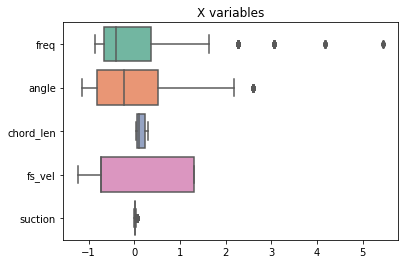

In [13]:
ax = sns.boxplot(data=X, orient="h", palette="Set2")
ax.set_title('X variables')

# 3. Analysis

In [14]:
from sklearn.model_selection import train_test_split # to Split Train-Test data
from sklearn import tree # To get Decision Tree
from sklearn.linear_model import SGDRegressor #to get the SGDRegressor
from sklearn import metrics # To generate evaluation metrices
from sklearn.model_selection import cross_val_predict # To generate evaluation metrices
from sklearn.model_selection import cross_val_score # To generate evaluation 

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X,data['Sound_press'],test_size=0.2, random_state=0)
print(X_train.shape)
print(X_test.shape)
#Initialise a Decision Tree with maximum depth of 3
dtRegressor = tree.DecisionTreeRegressor(criterion='mse', max_depth=3, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=0, splitter='best')

(1202, 5)
(301, 5)


Crossvalidation Coefficient of determination on training set : 0.4440699849724427




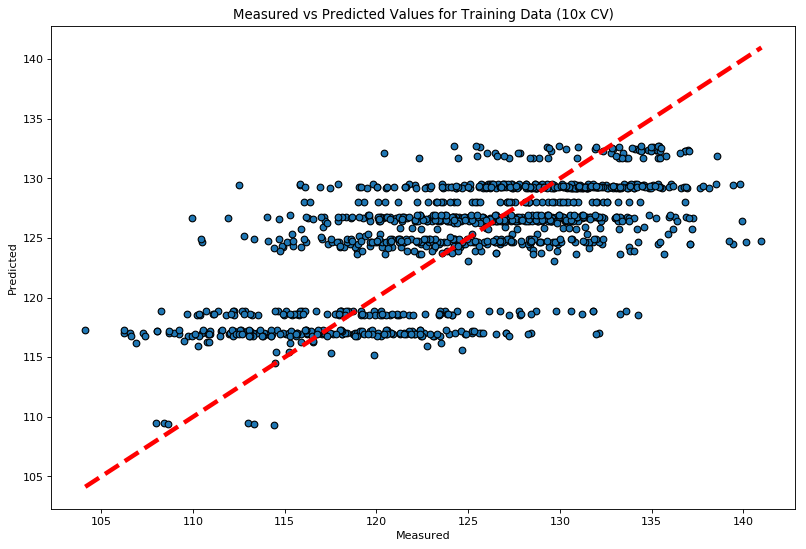

In [28]:
#Model Performance in Train Data
CV_predicted = cross_val_predict(dtRegressor, X_train, y_train, cv=10) # CV prediction on Train data
r2_score_cv = cross_val_score(dtRegressor, X_train, y_train, cv=10).mean() # CV model score on Train data
print ("Crossvalidation Coefficient of determination on training set :",r2_score_cv)
print("\n")
# Plot measured values vs predicted values Training Data
plt.figure(num=None, figsize=(12, 8), dpi=80, facecolor='w', edgecolor='k')
plt.scatter(y_train, CV_predicted, edgecolors=(0, 0, 0))
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r--', lw=4)
plt.xlabel('Measured')
plt.ylabel('Predicted')
plt.title('Measured vs Predicted Values for Training Data (10x CV)')
plt.show()

In [29]:
# Fit the model and predict
dtRegressor.fit(X_train,y_train)
y_predicted = dtRegressor.predict(X_test)

# Model Performance on test data
r2_scoredt = dtRegressor.score(X_test,y_test) #R2 Score
print ("Coefficient of determination on test set: ",r2_scoredt)

mse_score = metrics.mean_squared_error(y_test, y_predicted) #Mean Squared Error
print ("\nMean Squared Error on test set :",mse_score)


Coefficient of determination on test set:  0.473560012033851

Mean Squared Error on test set : 24.76321578454581


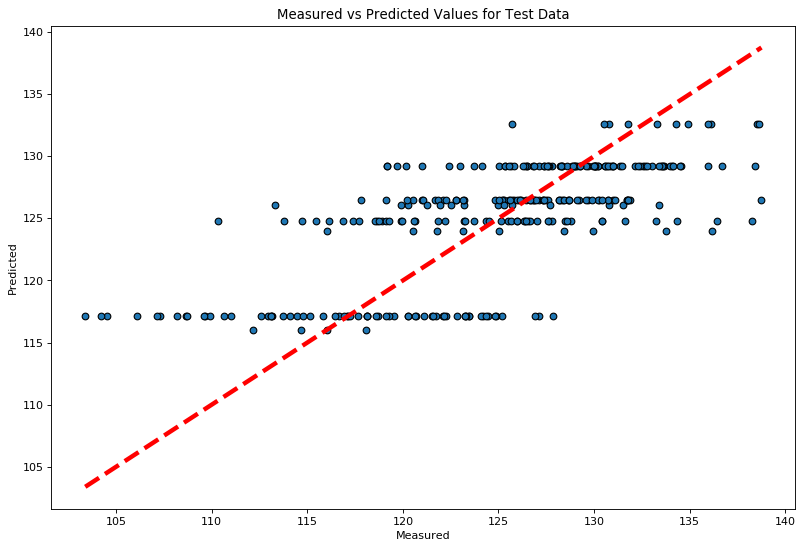

In [30]:
# Plot measured values vs predicted values
plt.figure(num=None, figsize=(12, 8), dpi=80, facecolor='w', edgecolor='k')
plt.scatter(y_test, y_predicted, edgecolors=(0, 0, 0))
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=4)
plt.xlabel('Measured')
plt.ylabel('Predicted')
plt.title('Measured vs Predicted Values for Test Data')
plt.show()

[4 0 2 3 1] [0.35585421 0.         0.09539949 0.         0.5487463 ]


Text(0.5, 1.0, 'Variable Importance')

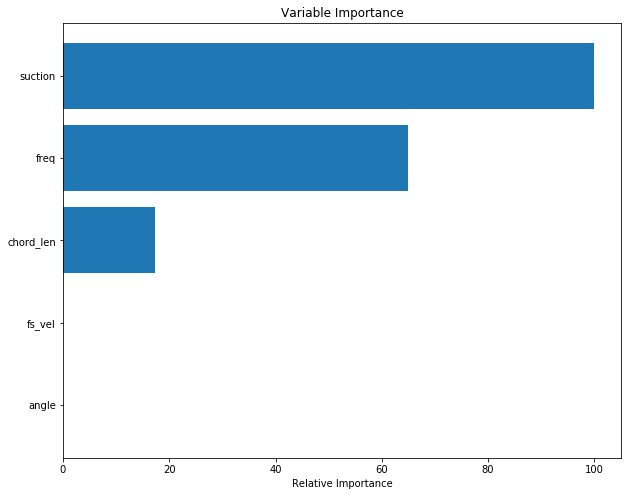

In [31]:
feature_names = X.columns
importances = dtRegressor.feature_importances_
indices = np.argsort(importances)[::-1]
print(indices,importances)

# #############################################################################
# Plot feature importance
feature_importance = dtRegressor.feature_importances_
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = range(X_train.shape[1]);

plt.figure(figsize=(10,8))
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, feature_names[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')

SGD Regressor Analysis

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X,data['Sound_press'],test_size=0.2, random_state=0)
print(X_train.shape)
print(X_test.shape)

#SGD Regressor with L1 penalty
SGDReg = SGDRegressor(loss='squared_loss', penalty='l1', alpha=0.0001,
                 l1_ratio=0.15, fit_intercept=True, max_iter=1000, tol=0.001, 
                 shuffle=True, verbose=0, epsilon=0.1, random_state=None, learning_rate='invscaling',
                 eta0=0.01, power_t=0.25, early_stopping=False, validation_fraction=0.1,
                 n_iter_no_change=5, warm_start=False, average=False)

(1202, 5)
(301, 5)


Crossvalidation Coefficient of determination on training set : 0.4601601219807435




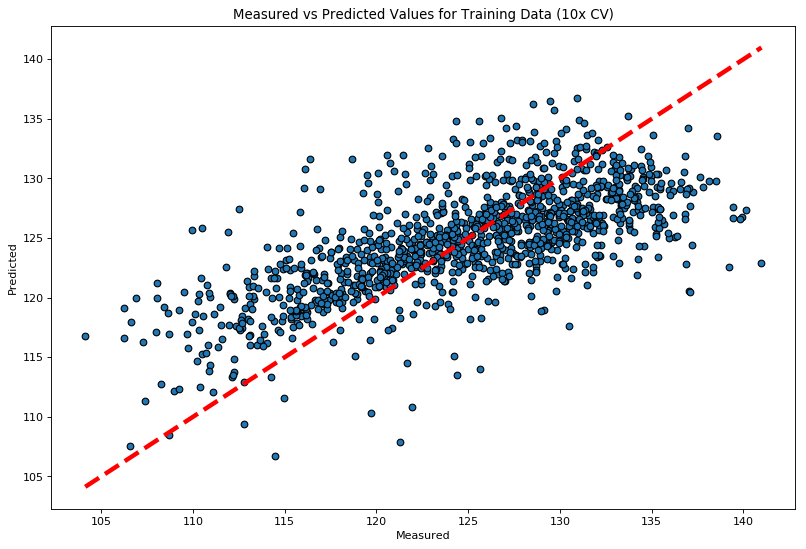

In [33]:
#Model Performance in Train Data
CV_predicted = cross_val_predict(SGDReg, X_train, y_train, cv=10) # CV prediction on Train data
r2_score_cv = cross_val_score(SGDReg, X_train, y_train, cv=10).mean() # CV model score on Train data
print ("Crossvalidation Coefficient of determination on training set :",r2_score_cv)
print("\n")

# Plot measured values vs predicted values Training Data
plt.figure(num=None, figsize=(12, 8), dpi=80, facecolor='w', edgecolor='k')
plt.scatter(y_train, CV_predicted, edgecolors=(0, 0, 0))
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r--', lw=4)
plt.xlabel('Measured')
plt.ylabel('Predicted')
plt.title('Measured vs Predicted Values for Training Data (10x CV)')
plt.show()

In [34]:
# Fit the model and predict
SGDReg.fit(X_train,y_train)
y_predicted = SGDReg.predict(X_test)

# Model Performance on test data
r2_scoresgd = SGDReg.score(X_test,y_test) #R2 Score
print ("Coefficient of determination on test set: ",r2_scoresgd)

mse_score = metrics.mean_squared_error(y_test, y_predicted) #Mean Squared Error
print ("\nMean Squared Error on test set :",mse_score)

Coefficient of determination on test set:  0.5172281036422619

Mean Squared Error on test set : 22.70911199281803


In [35]:
coef = SGDReg.coef_
intercept = SGDReg.intercept_
print('Intercept: {}'.format(intercept))

# No iterables are passed
result = zip()

# Converting itertor to list
resultList = list(result)
print(resultList)

# Two iterables are passed
result = zip(X, coef)

# Converting itertor to set
resultSet = set(result)
print(resultSet)

Intercept: [129.34010305]
[]
{('freq', -3.9326635883560925), ('suction', -3.2329215070141863), ('chord_len', -32.66827158636461), ('fs_vel', 1.5660811066638352), ('angle', -3.6237405433211918)}


In [37]:
SGDReg.summary()

AttributeError: 'SGDRegressor' object has no attribute 'summary'